# Data Science 60-Hour Course Capstone Project

## A. Import Libraries and Data Set, and Inspect Data Set

** Import numpy and pandas. **

In [1]:
import numpy as np
import pandas as pd

** Import data visualization libraries and set %matplotlib inline. **

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Import IBM Employee Churn / Attrition comma-separated (CSV) file into a Pandas dataframe called churn. **

In [3]:
churn = pd.read_csv('../data/ibm_hr_emp_churn.csv', sep=',')

** Create copy of churn dataframe for exploratory data analysis and feature engineering. **

In [4]:
churn1 = churn.copy()

** View first five rows of churn dataframe. **

In [5]:
churn1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


** Obtain number of rows and columns in churn dataframe. **

In [6]:
churn1.shape

(1470, 35)

** View structure of churn dataframe. ** 

In [7]:
churn1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

** Check for presence of missing values for all features. **

In [8]:
churn1.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## B. Explore and Engineer Categorical Features

** Gather summary statistics for categorical features. **

In [9]:
churn1.describe(include=['object'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


** Obtain value counts for Attrition variable. **

In [10]:
churn1.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

** Generate Churn dummy variable by mapping Attrition categories to 0 or 1. (0 = No, 1 = Yes) **

In [11]:
churn1['Churn'] = churn1.Attrition.map({'No':0, 'Yes':1})
churn1.Churn.value_counts()

0    1233
1     237
Name: Churn, dtype: int64

** Obtain value counts for BusinessTravel variable. **

In [12]:
churn1.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

** Convert BusinessTravel to numeric BusTravLevel (Business Travel Level) variable. (0 = Non-Travel, 1 = Travel_Rarely, 2 = Travel_Frequently) ** 

In [13]:
churn1['BusTravLevel'] = churn1.BusinessTravel.map({'Travel_Rarely':1, 'Travel_Frequently':2, 'Non-Travel':0})
churn1.BusTravLevel.value_counts()

1    1043
2     277
0     150
Name: BusTravLevel, dtype: int64

** Obtain value counts and employee churn probabilities for each Department. **

In [14]:
churn1.groupby('Department').Churn.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
Department,,
Sales,446,0.206278
Human Resources,63,0.190476
Research & Development,961,0.138398


** Create Department dummy variables and add it to churn dataframe. **

In [15]:
dept_dummies = pd.get_dummies(churn1.Department).drop('Research & Development', axis=1)
dept_dummies = dept_dummies.rename(columns={'Human Resources':'HR_Dept', 'Sales':'Sales_Dept'})
churn2 = pd.concat([churn1, dept_dummies], axis=1)
churn2.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Churn,BusTravLevel,HR_Dept,Sales_Dept
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,1,6,4,0,5,1,1,0,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,3,3,10,7,1,7,0,2,0,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,3,3,0,0,0,0,1,1,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,3,8,7,3,0,0,2,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,3,3,2,2,2,2,0,1,0,0


** Obtain value counts and employee churn probabilities for each Education Field. **

In [16]:
churn2.groupby('EducationField').Churn.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
EducationField,,
Human Resources,27,0.259259
Technical Degree,132,0.242424
Marketing,159,0.220126
Life Sciences,606,0.146865
Medical,464,0.135776
Other,82,0.134146


** Create Education Field dummy variables and add it to churn dataframe. **

In [17]:
edu_dummies = pd.get_dummies(churn2.EducationField).drop('Life Sciences', axis=1)
edu_dummies = edu_dummies.rename(columns={'Human Resources':'HR_Major', 'Technical Degree':'Tech_Major', 'Marketing':
                                          'Market_Major', 'Medical':'Med_Major', 'Other':'Other_Major'})
churn3 = pd.concat([churn2, edu_dummies], axis=1)
churn3.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,YearsWithCurrManager,Churn,BusTravLevel,HR_Dept,Sales_Dept,HR_Major,Market_Major,Med_Major,Other_Major,Tech_Major
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,5,1,1,0,1,0,0,0,0,0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,7,0,2,0,0,0,0,0,0,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,1,1,0,0,0,0,0,1,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0,0,2,0,0,0,0,0,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,2,0,1,0,0,0,0,1,0,0


** Obtain value counts for Gender variable. **

In [18]:
churn3.Gender.value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

** Generate Gender_Dum dummy variable by mapping Gender categories to 0 or 1. (0 = Male, 1 = Female) **

In [19]:
churn3['Gender_Dum'] = churn3.Gender.map({'Male':0, 'Female':1})
churn3.Gender_Dum.value_counts()

0    882
1    588
Name: Gender_Dum, dtype: int64

** Obtain value counts and employee churn probabilities for each Job Role. **

In [20]:
churn3.groupby('JobRole').Churn.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
JobRole,,
Sales Representative,83,0.397590
Laboratory Technician,259,0.239382
Human Resources,52,0.230769
Sales Executive,326,0.174847
Research Scientist,292,0.160959
Manufacturing Director,145,0.068966
Healthcare Representative,131,0.068702
Manager,102,0.049020
Research Director,80,0.025000


** Create Job Role dummy variables and add it to churn dataframe. **

In [21]:
job_dummies = pd.get_dummies(churn3.JobRole).drop('Sales Executive', axis=1)
job_dummies = job_dummies.rename(columns={'Sales Representative':'Sales_Rep', 'Laboratory Technician':'Lab_Tech',
                                          'Human Resources':'HR', 'Research Scientist':'Research_Sci',
                                          'Manufacturing Director':'Manuf_Dir', 'Healthcare Representative':'HC_Rep',
                                          'Manager':'Mgr', 'Research Director':'Research_Dir'})
churn4 = pd.concat([churn3, job_dummies], axis=1)
churn4.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,Tech_Major,Gender_Dum,HC_Rep,HR,Lab_Tech,Mgr,Manuf_Dir,Research_Dir,Research_Sci,Sales_Rep
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,1,0,0,0,0,0,0,0,0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,0,0,0,0,0,0,0,0,1,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,0,0,0,1,0,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0,1,0,0,0,0,0,0,1,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,0,0,0,0,1,0,0,0,0,0


** Obtain value counts and employee churn probabilities for each Marital Status. **

In [22]:
churn4.groupby('MaritalStatus').Churn.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
MaritalStatus,,
Single,470,0.255319
Married,673,0.124814
Divorced,327,0.100917


** Create Marital Status dummy variables and add it to churn dataframe. **

In [23]:
marital_dummies = pd.get_dummies(churn4.MaritalStatus).drop('Married', axis=1)
churn5 = pd.concat([churn4, marital_dummies], axis=1)
churn5.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,HC_Rep,HR,Lab_Tech,Mgr,Manuf_Dir,Research_Dir,Research_Sci,Sales_Rep,Divorced,Single
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,0,0,0,0,0,0,0,0,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,0,0,0,0,0,0,1,0,0,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,0,1,0,0,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0,0,0,0,0,0,1,0,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,0,0,1,0,0,0,0,0,0,0


** Obtain value counts for Over18 variable. **

In [24]:
churn5.Over18.value_counts()

Y    1470
Name: Over18, dtype: int64

** Obtain value counts for OverTime variable. **

In [25]:
churn5.OverTime.value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

** Generate Overtime_Dum dummy variable by mapping OverTime categories to 0 or 1. (0 = No, 1 = Yes) **

In [26]:
churn5['Overtime_Dum'] = churn5.OverTime.map({'No':0, 'Yes':1})
churn5.Overtime_Dum.value_counts()

0    1054
1     416
Name: Overtime_Dum, dtype: int64

** Drop unengineered or unnecessary categorical features from churn dataframe. **

In [27]:
churn_eng_cat = churn5.drop(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus',
                              'Over18', 'OverTime'], axis=1)

** Obtain number of rows and columns in churn dataframe with engineered categorical features and unengineered numerical features. **

In [28]:
churn_eng_cat.shape

(1470, 47)

** View structure of churn dataframe with engineered categorical features and unengineered numerical features. ** 

In [29]:
churn_eng_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 47 columns):
Age                         1470 non-null int64
DailyRate                   1470 non-null int64
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobSatisfaction             1470 non-null int64
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked          1470 non-null int64
PercentSalaryHike           1470 non-null int64
PerformanceRating           1470 non-null int64
RelationshipSatisfaction    1470 non-null int64
StandardHours               1470 non-null int64
StockOptionLevel            1

## C. Explore and Engineer Numerical Features

** Drop unnecessary numerical features from churn dataframe. **

In [30]:
churn6 = churn_eng_cat.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours'], axis=1)

** Remap ordered numerical features so that lowest level is 0 instead of 1. **

In [31]:
churn6['Education'] = churn6.Education.map({1:0, 2:1, 3:2, 4:3, 5:4})
churn6['EnvironmentSatisfaction'] = churn6.EnvironmentSatisfaction.map({1:0, 2:1, 3:2, 4:3})
churn6['JobInvolvement'] = churn6.JobInvolvement.map({1:0, 2:1, 3:2, 4:3})
churn6['JobLevel'] = churn6.JobLevel.map({1:0, 2:1, 3:2, 4:3, 5:4})
churn6['JobSatisfaction'] = churn6.JobSatisfaction.map({1:0, 2:1, 3:2, 4:3})
churn6['PerformanceRating'] = churn6.PerformanceRating.map({1:0, 2:1, 3:2, 4:3})
churn6['RelationshipSatisfaction'] = churn6.RelationshipSatisfaction.map({1:0, 2:1, 3:2, 4:3})
churn6['WorkLifeBalance'] = churn6.WorkLifeBalance.map({1:0, 2:1, 3:2, 4:3})

** Extract numerical features from churn dataframe to see correlation matrix between features. **

In [32]:
num_features = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
                'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
               'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
               'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
churn_num_feat = churn6[num_features]

** Check the number of numerical features. **

In [33]:
churn_num_feat.shape

(1470, 23)

** View correlation matrix for numerical features. **

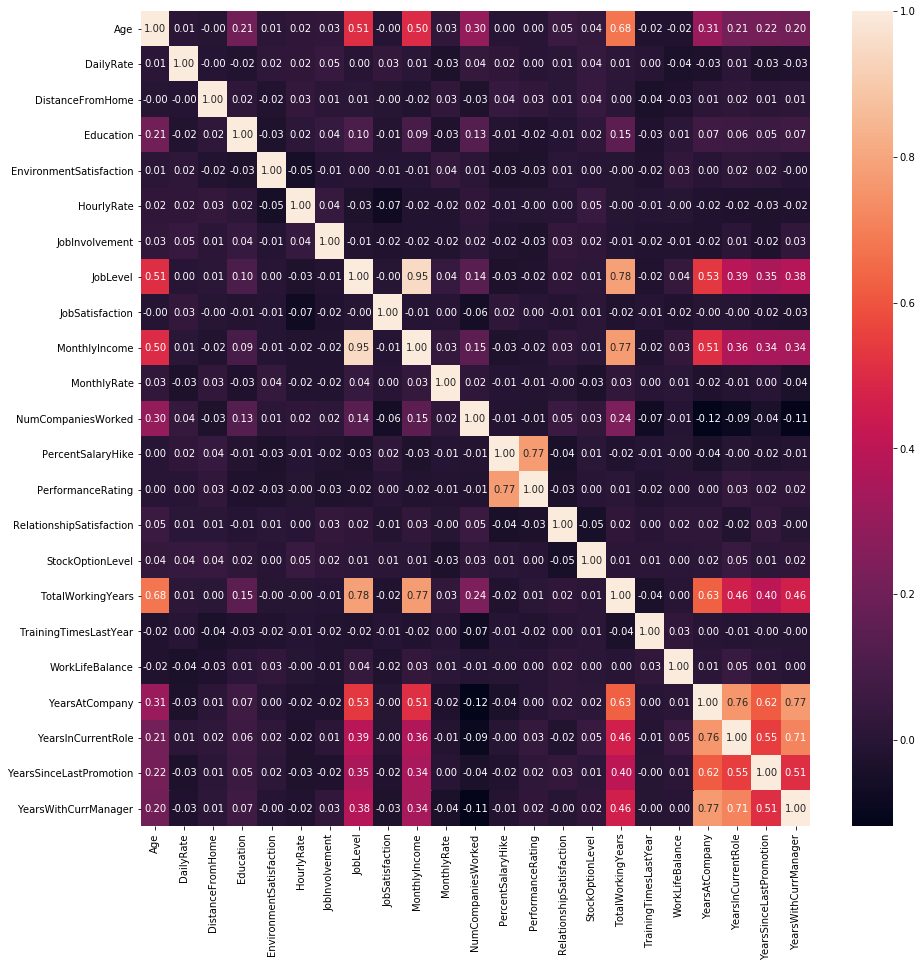

In [34]:
plt.figure(figsize=(15, 15))
sns.heatmap(churn_num_feat.corr(), annot=True, fmt=".2f")

## D. Feature Selection

** Define X and y for feature selection. **

In [35]:
X = churn6.drop(['Churn'], axis=1)
y = churn6['Churn']

** Select features by assessing their importance using embedded random forests method. **

In [36]:
# Feature Selection: Embedded Method
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)

feature_imp = pd.DataFrame(model.feature_importances_, index=X.columns, columns=["importance"])
feat_imp_13 = feature_imp.sort_values("importance", ascending=False).head(13).index
feat_imp_13

Index(['MonthlyIncome', 'Overtime_Dum', 'DailyRate', 'Age',
       'TotalWorkingYears', 'NumCompaniesWorked', 'MonthlyRate', 'HourlyRate',
       'PercentSalaryHike', 'DistanceFromHome', 'YearsAtCompany',
       'WorkLifeBalance', 'StockOptionLevel'],
      dtype='object')

** Select features with filter method that removes all low-variance features. **

In [37]:
# Feature Selection: Filter Method
from sklearn.feature_selection import VarianceThreshold, f_regression, SelectKBest

# Find all features with more than 90% variance in values.
threshold = 0.90
vt = VarianceThreshold().fit(X)

# Find feature names.
feat_var_threshold = X.columns[vt.variances_ > threshold * (1-threshold)]

# Select the top 13. 
feat_var_threshold[0:13]

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike'],
      dtype='object')

** Filter for features selected by embedded random forest method but were not selected by filter method. **

In [38]:
set(feat_var_threshold[0:13]) - set(feat_imp_13)

{'Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction'}

** Filter for features selected by filter method that removes all low-variance features but were not selected by embedded random forest method. **

In [39]:
set(feat_imp_13) - set(feat_var_threshold)

set()

** Select features based on univariate statistical tests. **

In [40]:
# Feature Selection: Filter Method
X_scored = SelectKBest(score_func=f_regression, k='all').fit(X, y)
feature_scoring = pd.DataFrame({
        'feature': X.columns,
        'score': X_scored.scores_
    })

feat_scored_13 = feature_scoring.sort_values('score', ascending=False).head(13)['feature'].values
feat_scored_13

array(['Overtime_Dum', 'Single', 'TotalWorkingYears', 'JobLevel',
       'YearsInCurrentRole', 'MonthlyIncome', 'Age', 'Sales_Rep',
       'YearsWithCurrManager', 'StockOptionLevel', 'YearsAtCompany',
       'JobInvolvement', 'BusTravLevel'], dtype=object)

** Select features by eliminating them recursively via wrapper method. **

In [41]:
# Feature Selection: Wrapper Method
from sklearn.linear_model import LogisticRegression

# Select 13 features by using recursive feature elimination (RFE) with logistic regression model.
from sklearn.feature_selection import RFE
rfe = RFE(LogisticRegression(), 13)
rfe.fit(X, y)

feature_rfe_scoring = pd.DataFrame({
        'feature': X.columns,
        'score': rfe.ranking_
    })

feat_rfe_13 = feature_rfe_scoring[feature_rfe_scoring['score'] == 1]['feature'].values
feat_rfe_13

array(['EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'BusTravLevel', 'Sales_Dept', 'HR_Major', 'Tech_Major', 'HR',
       'Lab_Tech', 'Research_Dir', 'Sales_Rep', 'Single', 'Overtime_Dum'], dtype=object)

** Gather unique features from all four feature selection methods. **

In [42]:
features = np.hstack([
        feat_var_threshold[0:13], 
        feat_imp_13,
        feat_scored_13,
        feat_rfe_13
    ])

features = np.unique(features)
print('Final features set:\n')
for f in features:
    print("\t-{}".format(f))

Final features set:

	-Age
	-BusTravLevel
	-DailyRate
	-DistanceFromHome
	-Education
	-EnvironmentSatisfaction
	-HR
	-HR_Major
	-HourlyRate
	-JobInvolvement
	-JobLevel
	-JobSatisfaction
	-Lab_Tech
	-MonthlyIncome
	-MonthlyRate
	-NumCompaniesWorked
	-Overtime_Dum
	-PercentSalaryHike
	-Research_Dir
	-Sales_Dept
	-Sales_Rep
	-Single
	-StockOptionLevel
	-Tech_Major
	-TotalWorkingYears
	-WorkLifeBalance
	-YearsAtCompany
	-YearsInCurrentRole
	-YearsWithCurrManager


** Select features using tree-based estimators. **

In [43]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y) 
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X.columns          

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusTravLevel',
       'HR_Dept', 'Sales_Dept', 'HR_Major', 'Market_Major', 'Med_Major',
       'Other_Major', 'Tech_Major', 'Gender_Dum', 'HC_Rep', 'HR', 'Lab_Tech',
       'Mgr', 'Manuf_Dir', 'Research_Dir', 'Research_Sci', 'Sales_Rep',
       'Divorced', 'Single', 'Overtime_Dum'],
      dtype='object')

** Create churn / attrition modeling data by selecting target feature and predictor features for modeling. **

In [44]:
modeling_cols = ['Churn', 'MonthlyIncome', 'Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'StockOptionLevel', 
                 'PercentSalaryHike', 'JobInvolvement', 'Overtime_Dum', 'Single', 'Sales_Rep', 'BusTravLevel']
churn_model = churn6[modeling_cols]

** Obtain value counts and employee churn probabilities for Overtime_Dum (Overtime dummy) variable, a categorical feature that highly impacts likelihood of employee to churn. **

In [45]:
churn_model.groupby('Overtime_Dum').Churn.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
Overtime_Dum,,
1,416,0.305288
0,1054,0.104364


** Generate histogram for Monthly Income, a numerical feature that highly impacts likelihood of employee to churn. **

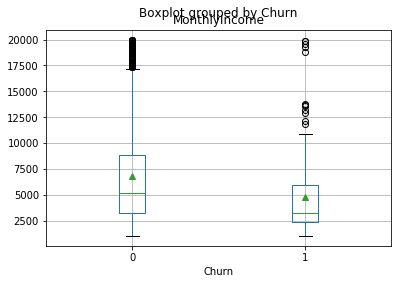

In [46]:
churn_model.boxplot(column='MonthlyIncome', by='Churn', showmeans=True)

** Export finalized churn modeling dataframe to CSV file. **

In [47]:
churn_model.to_csv('../data/churn_modeling_data.csv', sep=',', index=False)

## E. Build a Logistic Regression Model

** Import numpy and pandas. **

In [48]:
import numpy as np
import pandas as pd

** Import data visualization libraries and set %matplotlib inline. **

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Import churn modeling CSV file into a Pandas dataframe called churn_model2. **

In [50]:
churn_model2 = pd.read_csv('../data/churn_modeling_data.csv', sep=',')

** Check number of rows and columns in churn_model2 dataframe. **

In [51]:
churn_model2.shape

(1470, 12)

** View structure of churn_model2 dataframe. **

In [52]:
churn_model2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
Churn                      1470 non-null int64
MonthlyIncome              1470 non-null int64
Age                        1470 non-null int64
DistanceFromHome           1470 non-null int64
EnvironmentSatisfaction    1470 non-null int64
StockOptionLevel           1470 non-null int64
PercentSalaryHike          1470 non-null int64
JobInvolvement             1470 non-null int64
Overtime_Dum               1470 non-null int64
Single                     1470 non-null int64
Sales_Rep                  1470 non-null int64
BusTravLevel               1470 non-null int64
dtypes: int64(12)
memory usage: 137.9 KB


** View first five rows of churn_model2 dataframe. **

In [53]:
churn_model2.head()

,Churn,MonthlyIncome,Age,DistanceFromHome,EnvironmentSatisfaction,StockOptionLevel,PercentSalaryHike,JobInvolvement,Overtime_Dum,Single,Sales_Rep,BusTravLevel
0,1,5993,41,1,1,0,11,2,1,1,0,1
1,0,5130,49,8,2,1,23,1,0,0,0,2
2,1,2090,37,2,3,0,15,1,1,1,0,1
3,0,2909,33,3,3,0,11,2,1,0,0,2
4,0,3468,27,2,0,1,12,2,0,0,0,1


** Define X and y to split data into training and test sets, and construct logistic regression model. **

In [54]:
feature_cols = ['MonthlyIncome', 'Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'StockOptionLevel', 'PercentSalaryHike', 
               'JobInvolvement', 'Overtime_Dum', 'Single', 'Sales_Rep', 'BusTravLevel']
X = churn_model2[feature_cols]
y = churn_model2['Churn']

** Decide which random state seed number will provide the highest area under the ROC curve (AUC). **

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [56]:
seed_range = range(100, 110)

auc_scores = []

for seed in seed_range:
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed)
    logreg = LogisticRegression(C=1e9)
    logreg.fit(X_train, y_train)
    y_pred_prob = logreg.predict_proba(X_test)[:, 1]
    auc_scores.append(metrics.roc_auc_score(y_test, y_pred_prob).round(3))

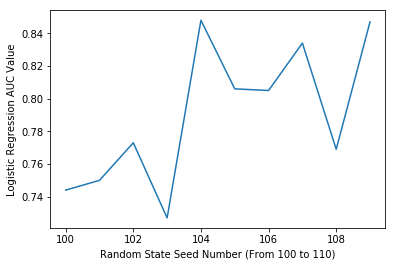

In [57]:
plt.plot(seed_range, auc_scores)
plt.xlabel('Random State Seed Number (From 100 to 110)')
plt.ylabel('Logistic Regression AUC Value')

In [58]:
print(auc_scores)

[0.74399999999999999, 0.75, 0.77300000000000002, 0.72699999999999998, 0.84799999999999998, 0.80600000000000005, 0.80500000000000005, 0.83399999999999996, 0.76900000000000002, 0.84699999999999998]


* 104 is the random state seed number that will produce the highest AUC value.

** Split churn / attrition modeling data into training and test sets. **

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104)

In [60]:
print(churn_model2.shape)
print(X_train.shape)
print(X_test.shape)

(1470, 12)
(1102, 11)
(368, 11)


** Fit a logistic regression model on training data set. **

In [61]:
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

** Print logistic regression model intercept and coefficients. **

In [62]:
print(logreg.intercept_)
dict(zip(feature_cols, logreg.coef_[0]))

[ 0.0068947]


{'Age': -0.021430728838182811,
 'BusTravLevel': 0.47358334156682907,
 'DistanceFromHome': 0.029616030087601532,
 'EnvironmentSatisfaction': -0.37598360237595485,
 'JobInvolvement': -0.42457248566784139,
 'MonthlyIncome': -8.0779597717314764e-05,
 'Overtime_Dum': 1.4952511517263383,
 'PercentSalaryHike': -0.037879640958373782,
 'Sales_Rep': 0.92257912216857374,
 'Single': 0.67942105125138263,
 'StockOptionLevel': -0.29975426285035545}

** Express logistic regression model coefficients as odds. **

In [63]:
dict(zip(feature_cols, np.exp(logreg.coef_[0])))

{'Age': 0.97879727754542456,
 'BusTravLevel': 1.6057378034293865,
 'DistanceFromHome': 1.0300589463681096,
 'EnvironmentSatisfaction': 0.6866135917815348,
 'JobInvolvement': 0.6540493408357001,
 'MonthlyIncome': 0.99991922366486652,
 'Overtime_Dum': 4.4604566635743801,
 'PercentSalaryHike': 0.96282881907147988,
 'Sales_Rep': 2.5157705093260816,
 'Single': 1.9727352889274199,
 'StockOptionLevel': 0.74100028960930642}

** Make predictions on test data set and calculate accuracy. **

In [64]:
y_pred_class = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class).round(3))

0.867


** Compute null accuracy manually. **

In [65]:
print(1 - y_test.mean())

0.839673913043


** Calculate AUC value for logistic regression model. **

In [66]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
print(metrics.roc_auc_score(y_test, y_pred_prob).round(3))

0.848


** Plot logistic regression model ROC curve. **

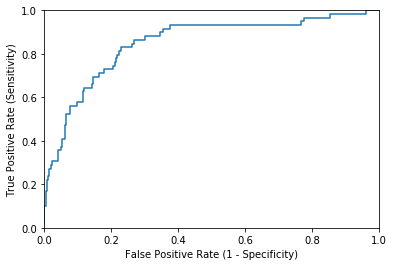

In [67]:
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

** Print confusion matrix to calculate accuracy and error rates plus precision and recall. **

In [68]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[301   8]
 [ 41  18]]


** Calculate accuracy rate. **

In [69]:
float(301 + 18) / float(301 + 8 + 41 + 18)

0.8668478260869565

** Calculate misclassification / error rate. **

In [70]:
float(41 + 8) / float(301 + 8 + 41 + 18)

0.1331521739130435

** Calculate precision to measure how confident the logistic regression model is for capturing the positives. **

In [71]:
float(18) / float(18 + 8)

0.6923076923076923

** Calculate recall / sensitivity to measure how well the logistic regression model is capturing the positives. **

In [72]:
float(18) / float(41 + 18)

0.3050847457627119

** Calculate specificity to measure how well the logistic regression model is capturing the negatives. **

In [73]:
float(301) / float(301 + 8)

0.9741100323624595

** List out false positives in test data set. **

In [74]:
X_test[y_test < y_pred_class]

,MonthlyIncome,Age,DistanceFromHome,EnvironmentSatisfaction,StockOptionLevel,PercentSalaryHike,JobInvolvement,Overtime_Dum,Single,Sales_Rep,BusTravLevel
665,3294,47,2,3,0,18,1,1,1,1,1
632,2515,42,2,1,0,14,2,1,1,0,2
55,13458,33,1,0,0,12,2,1,1,0,2
1102,2644,36,2,2,0,21,2,1,1,1,1
284,4741,26,11,0,1,13,2,1,0,0,2
909,2994,19,25,1,0,12,3,1,1,0,1
1168,3760,24,2,0,0,13,2,1,1,0,2
1436,2380,21,5,2,0,11,2,1,1,1,1


** List out false negatives in test data set. **

In [75]:
X_test[y_test > y_pred_class]

,MonthlyIncome,Age,DistanceFromHome,EnvironmentSatisfaction,StockOptionLevel,PercentSalaryHike,JobInvolvement,Overtime_Dum,Single,Sales_Rep,BusTravLevel
1442,4787,29,1,0,3,14,2,1,0,0,1
645,2800,29,1,1,3,19,1,1,0,1,1
1246,2180,30,8,2,1,11,1,0,0,0,2
439,9824,31,20,0,0,12,2,0,0,0,2
293,5828,26,4,3,0,12,1,1,1,0,1
1333,7314,46,10,2,3,21,2,0,0,0,1
573,5326,26,8,3,0,17,1,0,1,0,1
2,2090,37,2,3,0,15,1,1,1,0,1
480,2033,30,12,1,1,18,1,0,0,1,2
997,2394,27,17,3,0,13,2,1,1,0,1


** Compute average logistic regression model accuracy score using 10-fold cross-validation. **

In [76]:
from sklearn.cross_validation import cross_val_score

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [77]:
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean().round(3))

0.859


** List out logistic regression model accuracy scores using 10-fold cross-validation. **

In [78]:
acc_scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy').round(3)
print(acc_scores)

[ 0.885  0.872  0.865  0.864  0.864  0.837  0.85   0.842  0.856  0.856]


** Compute average logistic regression model AUC value using 10-fold cross-validation. **

In [79]:
print(cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean().round(3))

0.793


** List out logistic regression model AUC values using 10-fold cross-validation. **

In [80]:
auc_scores = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').round(3)
print(auc_scores)

[ 0.797  0.875  0.862  0.7    0.851  0.741  0.805  0.75   0.828  0.726]


## F. Build a k-Nearest Neighbors Model

** Filter out numeric features of MonthlyIncome, Age, DistanceFromHome, and PercentSalaryHike, and scale them. **

In [81]:
from sklearn import preprocessing

In [82]:
scale_feat = ['MonthlyIncome', 'Age', 'DistanceFromHome', 'PercentSalaryHike']
non_scale_feat = ['Churn', 'EnvironmentSatisfaction', 'StockOptionLevel', 'JobInvolvement', 'Overtime_Dum', 'Single', 
                  'Sales_Rep', 'BusTravLevel']
churn_model2_scale_feat = churn_model2[scale_feat]
churn_model2_non_scale_feat = churn_model2[non_scale_feat]
X_scaled = preprocessing.scale(churn_model2_scale_feat)

** Generate dataframe out of scaled numeric features. **

In [83]:
X_scaled_df = pd.DataFrame(X_scaled)
X_scaled_df.columns = ['MonthlyIncome', 'Age', 'DistanceFromHome', 'PercentSalaryHike']
X_scaled_df.head()

,MonthlyIncome,Age,DistanceFromHome,PercentSalaryHike
0,-0.108350,0.446350,-1.010909,-1.150554
1,-0.291719,1.322365,-0.147150,2.129306
2,-0.937654,0.008343,-0.887515,-0.057267
3,-0.763634,-0.429664,-0.764121,-1.150554
4,-0.644858,-1.086676,-0.887515,-0.877232


** Append remainder of churn_model2 dataframe with scaled numeric feature columns. **

In [84]:
churn_model2_scaled = pd.concat([churn_model2_non_scale_feat, X_scaled_df], axis=1)
churn_model2_scaled.head()

,Churn,EnvironmentSatisfaction,StockOptionLevel,JobInvolvement,Overtime_Dum,Single,Sales_Rep,BusTravLevel,MonthlyIncome,Age,DistanceFromHome,PercentSalaryHike
0,1,1,0,2,1,1,0,1,-0.108350,0.446350,-1.010909,-1.150554
1,0,2,1,1,0,0,0,2,-0.291719,1.322365,-0.147150,2.129306
2,1,3,0,1,1,1,0,1,-0.937654,0.008343,-0.887515,-0.057267
3,0,3,0,2,1,0,0,2,-0.763634,-0.429664,-0.764121,-1.150554
4,0,0,1,2,0,0,0,1,-0.644858,-1.086676,-0.887515,-0.877232


** Define X and y to split data into training and test sets, and construct k-nearest neighbors model. **

In [85]:
X = churn_model2_scaled.drop(['Churn'], axis=1)
y = churn_model2_scaled['Churn']

** Split scaled churn / attrition modeling data into training and test sets. **

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)

** Fit a k-nearest neighbors model on training data set, make predictions on test data set, and calculate accuracy scores for k ranging from 1 to 51. **

In [87]:
from sklearn.neighbors import KNeighborsClassifier

In [88]:
k_range = range(1, 51)

acc_scores1 = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc_scores1.append(metrics.accuracy_score(y_test, y_pred).round(3))

** Plot model accuracy scores against k-values. **

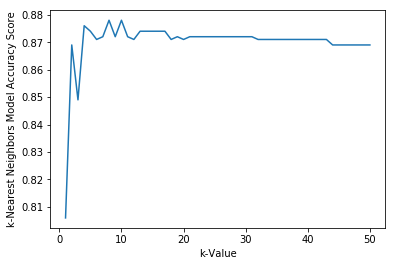

In [89]:
plt.plot(k_range, acc_scores1)
plt.xlabel('k-Value')
plt.ylabel('k-Nearest Neighbors Model Accuracy Score')

** Generate dataframe of k-values and their respective accuracy scores, and determine which k-value has the highest accuracy score. **

In [90]:
knn_acc_scores1 = pd.DataFrame({'k-Value':k_range, 'AccuracyScore':acc_scores1}).set_index('k-Value').sort_index(
    ascending=True)
knn_acc_scores1.iloc[7, :]

AccuracyScore    0.878
Name: 8, dtype: float64

* The optimal k-value of 8 has the highest accuracy score of 0.878.

** Check for consistency in 8 k-nearest neighbor model accuracy score for random state seed numbers from 115 to 130. **

In [91]:
seed_range = range(115, 130)

acc_scores2 = []

for seed in seed_range:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=seed)
    knn = KNeighborsClassifier(n_neighbors=8)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc_scores2.append(metrics.accuracy_score(y_test, y_pred).round(3))

** Plot 8 k-nearest neighbor model accuracy scores against random state seed numbers. **

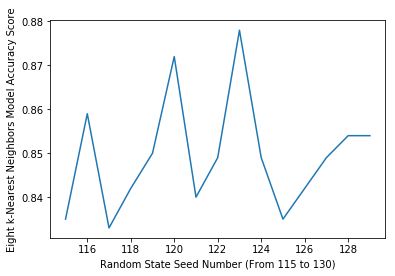

In [92]:
plt.plot(seed_range, acc_scores2)
plt.xlabel('Random State Seed Number (From 115 to 130)')
plt.ylabel('Eight k-Nearest Neighbors Model Accuracy Score')

* 123 is the random state seed number that will produce the highest accuracy score and best k-nearest neighbors model.

## G. Build a Decision Tree Model

** Define X and y to split data into training and test data sets, and construct decision tree model. **

In [93]:
X = churn_model2.drop(['Churn'], axis=1)
y = churn_model2['Churn']

** Tune decision tree model to avoid overfitting. **

In [94]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
max_depth_range1 = range(1, 10)

acc_scores3 = []

for depth in max_depth_range1:
    treereg = DecisionTreeClassifier(max_depth=depth, random_state=123)
    scores3 = cross_val_score(treereg, X, y, cv=14, scoring='accuracy')
    acc_scores3.append(scores3.mean().round(3))
    
print(acc_scores3)

[0.83899999999999997, 0.84599999999999997, 0.84299999999999997, 0.83099999999999996, 0.83699999999999997, 0.82699999999999996, 0.83299999999999996, 0.82099999999999995, 0.82899999999999996]


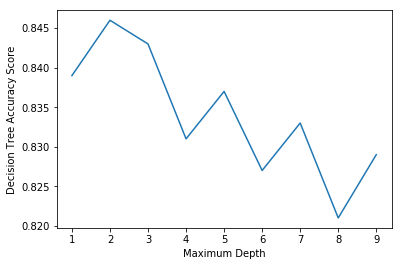

In [96]:
plt.plot(max_depth_range1, acc_scores3)
plt.xlabel('Maximum Depth')
plt.ylabel('Decision Tree Accuracy Score')

* The maximum depth of the decision tree should be 2 since the tree has the maximum accuracy score of 0.846.

** Decide which random state seed number will produce the highest accuracy score for a decision tree with a maximum depth of 2. **

In [97]:
seed_range2 = range(20, 30)

acc_scores4 = []

for seed in seed_range2:
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed)
    treereg = DecisionTreeClassifier(max_depth=2, random_state=123)
    treereg.fit(X_train, y_train)
    y_pred = treereg.predict(X_test)
    acc_scores4.append(metrics.accuracy_score(y_test, y_pred).round(3))

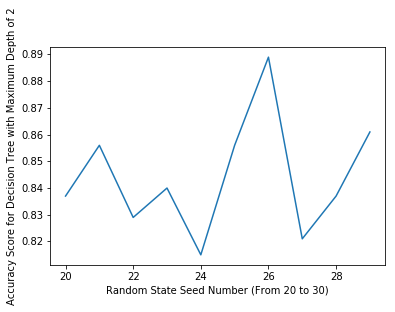

In [98]:
plt.plot(seed_range2, acc_scores4)
plt.xlabel('Random State Seed Number (From 20 to 30)')
plt.ylabel('Accuracy Score for Decision Tree with Maximum Depth of 2')

* 26 is the random state seed number that will produce the highest accuracy score for the decision tree with a maximum depth of 2.

** Split churn / attrition modeling data into training and test sets. **

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=26)

In [100]:
print(churn_model2.shape)
print(X_train.shape)
print(X_test.shape)

(1470, 12)
(1102, 11)
(368, 11)


** Fit a decision tree with maximum depth of 2 on training data set. **

In [101]:
treereg = DecisionTreeClassifier(max_depth=2, random_state=123)
treereg.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

** Make predictions on test data set and calculate accuracy. **

In [102]:
y_pred = treereg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred).round(3))

0.889


** Compute null accuracy manually. **

In [103]:
print(1 - y_test.mean())

0.885869565217


** Create GraphViz file of decision tree and display it in the notebook. (Note: DO NOT run the following cells off local drive Jupyter Notebook!!!) **

In [104]:
from sklearn.tree import export_graphviz
from IPython.display import Image
from IPython.display import display

In [105]:
export_graphviz(treereg, out_file='Churn_Decision_Tree.dot', feature_names=feature_cols)

In [106]:
! dot -Tpng Churn_Decision_Tree.dot -o Churn_Decision_Tree.png

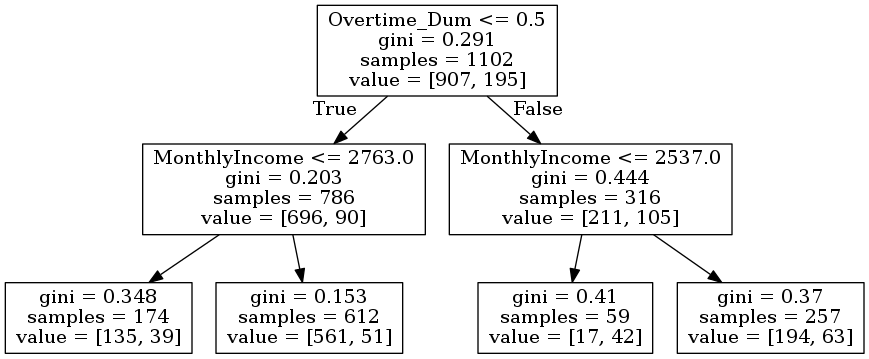

In [107]:
display(Image('Churn_Decision_Tree.png'))

** List out decision tree predictor features and their respective importances. **

In [108]:
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
0,MonthlyIncome,0.551401
7,Overtime_Dum,0.448599
1,Age,0.000000
2,DistanceFromHome,0.000000
3,EnvironmentSatisfaction,0.000000
4,StockOptionLevel,0.000000
5,PercentSalaryHike,0.000000
6,JobInvolvement,0.000000
8,Single,0.000000
9,Sales_Rep,0.000000


** Print confusion matrix to calculate accuracy and error rates plus precision and recall. **

In [109]:
print(metrics.confusion_matrix(y_test, y_pred))

[[320   6]
 [ 35   7]]


** Calculate accuracy rate. **

In [110]:
float(320 + 7) / float(320 + 6 + 35 + 7)

0.8885869565217391

** Calculate misclassification / error rate. **

In [111]:
float(35 + 6) / float(320 + 6 + 35 + 7)

0.11141304347826086

** Calculate precision to measure how confident the decision tree model is for capturing the positives. **

In [112]:
float(7) / float(6 + 7)

0.5384615384615384

** Calculate recall / sensitivity to measure how well the decision tree model is capturing the positives. **

In [113]:
float(7) / float(35 + 7)

0.16666666666666666

** Calculate specificity to measure how well the decision tree model is capturing the negatives. **

In [114]:
float(320) / float(320 + 6)

0.9815950920245399

** List out false positives in test data set. **

In [115]:
X_test[y_test < y_pred]

,MonthlyIncome,Age,DistanceFromHome,EnvironmentSatisfaction,StockOptionLevel,PercentSalaryHike,JobInvolvement,Overtime_Dum,Single,Sales_Rep,BusTravLevel
1402,1129,31,2,3,3,11,0,1,0,0,1
1028,2127,41,5,1,0,12,3,1,0,0,1
925,2372,42,7,1,0,16,3,1,0,0,1
889,2235,27,14,0,2,14,2,1,0,0,1
1087,2308,34,7,1,1,25,2,1,0,1,1
632,2515,42,2,1,0,14,2,1,1,0,2


** List out false negatives in test data set. **

In [116]:
X_test[y_test > y_pred]

,MonthlyIncome,Age,DistanceFromHome,EnvironmentSatisfaction,StockOptionLevel,PercentSalaryHike,JobInvolvement,Overtime_Dum,Single,Sales_Rep,BusTravLevel
1223,12936,47,9,2,0,11,0,0,0,0,2
469,4707,32,11,3,0,12,3,0,0,0,0
264,3485,28,2,0,0,11,2,0,1,0,1
182,3140,41,20,1,0,22,2,1,1,1,1
1438,1790,23,9,3,1,19,2,0,0,1,2
849,5346,43,9,0,0,13,0,0,1,0,1
50,5381,48,1,0,0,13,1,1,1,0,1
1167,5440,35,15,0,2,14,0,1,0,0,1
568,19859,55,2,3,1,13,2,1,0,0,1
1379,2863,27,22,0,0,12,1,0,0,0,2


## H. Use k-Means Clustering to Group Employees into Clusters

** Drop Churn target variable and include only predictor features in churn_model2 dataframe for k-means clustering. **

In [117]:
churn_pred_feat = churn_model2.drop(['Churn'], axis=1)

** Center and scale all predictor features. **

In [118]:
from sklearn.preprocessing import StandardScaler

In [119]:
scaler = StandardScaler()
churn_pred_feat_scaled = scaler.fit_transform(churn_pred_feat)

** Using scaled predictor features, determine how many clusters will yield the highest silhouette score. **

In [120]:
from sklearn.cluster import KMeans

In [121]:
k_range2 = range(2, 11)

sil_scores1 = []

for k in k_range2:
    km = KMeans(n_clusters=k, random_state=123)
    km.fit(churn_pred_feat_scaled)
    sil_scores1.append(metrics.silhouette_score(churn_pred_feat_scaled, km.labels_).round(3))
    
print(sil_scores1)

[0.14899999999999999, 0.16400000000000001, 0.161, 0.157, 0.13500000000000001, 0.14799999999999999, 0.13200000000000001, 0.127, 0.13100000000000001]


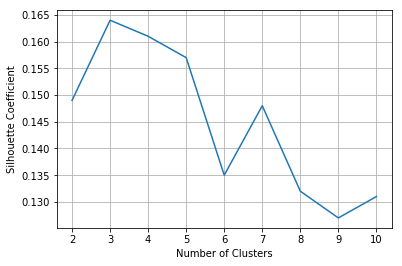

In [122]:
plt.plot(k_range2, sil_scores1)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

* The employees in the churn dataframe can be grouped into 3 clusters using k-means clustering and features for predicting churn.

** Group employees in churn_model2 dataframe into 3 clusters. **

In [123]:
kmeans_3s = KMeans(n_clusters=3, random_state=123)
kmeans_3s.fit(churn_pred_feat_scaled)
churn_pred_feat['cluster'] = kmeans_3s.labels_
churn_pred_feat.sort_values('cluster').head()

,MonthlyIncome,Age,DistanceFromHome,EnvironmentSatisfaction,StockOptionLevel,PercentSalaryHike,JobInvolvement,Overtime_Dum,Single,Sales_Rep,BusTravLevel,cluster
1087,2308,34,7,1,1,25,2,1,0,1,1,0
1308,5405,38,2,1,2,20,0,1,0,1,1,0
1391,2858,38,1,0,0,14,1,0,1,1,1,0
697,2157,29,20,2,1,15,2,0,0,1,2,0
238,3931,32,4,2,1,11,2,0,0,1,1,0


** Inspect cluster traits by calculating cluster centers as mean of features for predicting churn. **

In [124]:
churn_pred_feat.sort_values('cluster')
churn_pred_feat.groupby('cluster').mean()

,MonthlyIncome,Age,DistanceFromHome,EnvironmentSatisfaction,StockOptionLevel,PercentSalaryHike,JobInvolvement,Overtime_Dum,Single,Sales_Rep,BusTravLevel
cluster,,,,,,,,,,,
0,2626.00000,30.361446,8.662651,1.734940,0.626506,15.674699,1.650602,0.289157,0.457831,1.0,1.216867
1,6985.93089,37.899476,9.356021,1.716230,1.167539,15.174869,1.752880,0.287958,0.000000,0.0,1.072251
2,6180.06250,36.027778,8.932870,1.731481,0.000000,15.196759,1.694444,0.270833,1.000000,0.0,1.092593


** Obtain number of employees for each cluster. **

In [125]:
churn_pred_feat.cluster.value_counts()

1    955
2    432
0     83
Name: cluster, dtype: int64